In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Single layer, linear neural network

In [2]:
# forward pass
W = np.random.randn(5, 10)
X = np.random.randn(10, 3)
D = W.dot(X)

# now suppose we had the gradient on D from above in the circuit
dD = np.random.randn(*D.shape) # same shape as D

print(D.shape)
dW = dD.dot(X.T)

assert dW.shape == W.shape
dX = W.T.dot(dD)

(5, 3)


# Regression : Single layer, sigmoidal activation, least-squares error


$$s = w^T x$$
$$f = \sigma(s)$$

$$ L = (y - f)^2 $$

$$\partial L / \partial f = -2(y - f)$$

$$\partial L / \partial x =  \frac{\partial L}{\partial f }\frac{\partial f}{\partial s } = -2(y - f)\cdot f(1-f)$$

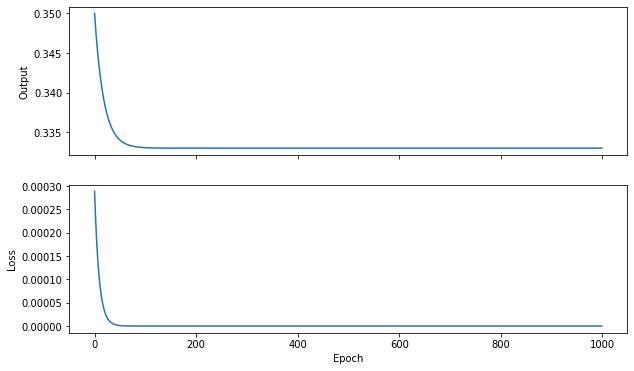

In [5]:
# sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_slope(x):
    return x*(1-x)
    #return 1/(1+np.exp(-x))

    
w = [0.5, 0.5, 0.1] # assume some random weights and data
x = [0.25, 0.25, 1]
# outputs are 1d
y = [0.333]
learning_rate = 0.1
losses = []
outputs = []
for j in range(1000):
    # forward pass
    s = w[0]*x[0] + w[1]*x[1] + w[2]*x[2]
    f = sigmoid(s)
    
    L = (y[0] - s)**2 # least squares loss
    
    # backward pass

    dLdf = -2*(y[0] - s) # gradient of loss wrt input
    dfds = sigmoid_slope(f)
    dLds = dLdf*dfds
    
    dLdx = [w[0] * dLds, w[1] * dLds] # backprop into x, multiplication acts like a "gradient switcher"
    dLdw = [x[0] * dLds, x[1] * dLds, x[2]*dLds] # backprop into w
    
    
    # we're done with BP! we have the gradients on the inputs to the circuit
    # now update the weights
    w[0] += -learning_rate*dLdw[0]
    w[1] += -learning_rate*dLdw[1]
    w[2] += -learning_rate*dLdw[2]
    
    losses.append(L)
    outputs.append(s)
    
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,6))
axs[0].set_ylabel('Output')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')

#print(w)
axs[0].plot(outputs)
axs[1].plot(losses)

# Single layer regression : vectorised

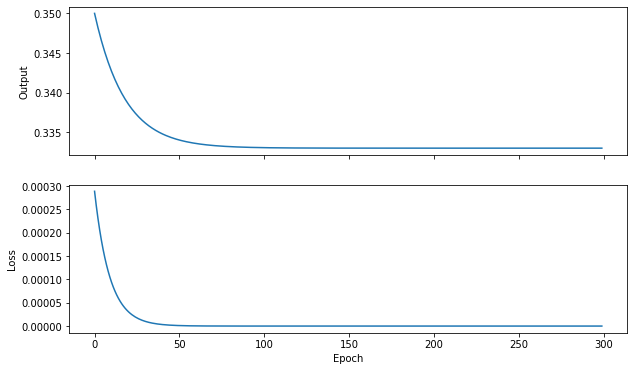

In [7]:

    
w = np.array([[0.5], 
              [0.5], 
              [0.1]]) # assume some random weights and data
x = np.array([[0.25], 
              [0.25], 
              [1]])
# outputs are 1d
y = np.array([0.333])

learning_rate = 0.1
losses = []
outputs = []

for j in range(300):
    # forward pass
    s = np.dot(w.T, x) 
    f = sigmoid(s)
    
    L = (y - s)**2 # least squares loss
    
    # backward pass

    dLdf = -2*(y - s) # gradient of loss wrt input
    dfds = sigmoid_slope(f)
    dLds = dLdf*dfds
    
    dLdx = w*dLds # backprop into x, multiplication acts like a "gradient switcher"
    dLdw = x*dLds # backprop into w
    
    
#     # we're done with BP! we have the gradients on the inputs to the circuit
#     # now update the weights
    w += -learning_rate*dLdw
    losses.append(L[0][0])
    outputs.append(s[0][0])

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,6))
axs[0].set_ylabel('Output')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')

#print(w)
axs[0].plot(outputs)
axs[1].plot(losses)

# Regression vectorised : one hidden layer, sigmoidal activation, least squares loss: 

Although it's unnecessary, we'll add another layer in. Now there is one hidden layer with sigmoidal activation.

### Forward Pass:
$$s_1 = W_1 x$$
$$f_1 = \sigma(s_1)$$
$$s_2 = W_2 f_1$$
$$ L = (y - s_2)^2 $$

### Backward pass
$$\frac{\partial L}{\partial s_2 } = -2(y - s_2)$$

$$\partial L / \partial f_1 =  \frac{\partial L}{\partial s_2 }\frac{\partial s_2}{\partial f_1 } = -2(y - s_2)\cdot W_2$$

$$\partial L / \partial s_1 =  \frac{\partial L}{\partial f_1 }\frac{\partial f_1}{\partial s_1 } \quad \text{where} \quad \frac{\partial f_1}{\partial s_1 } = f_1(1-f_1)$$

So the weight updates (this comes from the fact that multiplication "switches" the gradients between two inputs - in this case the weights and the inputs):
$$ \frac{\partial L}{\partial W_2 } = f_1\cdot\frac{\partial L}{\partial s_2 }$$
$$ \frac{\partial L}{\partial W_1 } = \frac{\partial L}{\partial s_1 } \cdot x^T$$

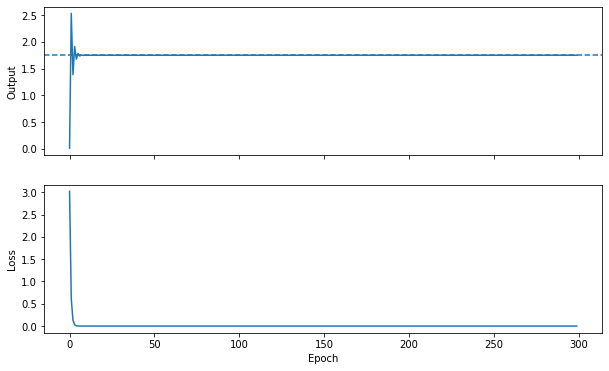

In [17]:
# vectorised

n_hidden = 21
np.random.seed(1)
W1 = np.random.normal(size=(n_hidden, 3)) # assume some random weights and data
W2 = np.random.normal(size=(1, n_hidden)) # assume some random weights and data

x = np.array([[0.25], 
              [0.25], 
              [1]])

# outputs are 1d
y = np.array([1.75])

learning_rate = 0.1
losses = []
outputs = []

for j in range(300):
    # forward pass
    s1 = np.dot(W1, x)  # Column vector : (n_hidden, 1)
    f1 = sigmoid(s1)    # ... again
    
    # output of second linear layer
    s2 = np.dot(W2, f1) # Column vec:     (1,1)
    
    # least squares loss
    L = (y - s2)**2     
    
    # backward pass
    # gradient of loss wrt input
    dLds2 = -2*(y - s2)  # (1 , 1)
    ds2df1 = W2                # local gradient      (1, n_hidden)
    dLdf1 = dLds2.dot(ds2df1)  # chain rule/BP       (1, n_hidden)
    dLdw2 = f1*dLds2           # backprop into w2    (1, n_hidden)
    
    # now this gets fed back into the first layer
    
    df1ds1 = sigmoid_slope(f1) # local gradient      (n_hidden, 1)
    #
    dLds1 = dLdf1.T*df1ds1                      #    (n_hidden, 1)
    
    dLdx = dLds1.T.dot(W1)      # backprop into x     (n_features, 1)
    # elementwise multiplication of 
    dLdw1 = dLds1.dot(x.T)           # backprop into w     (n_hidden, n_features)

    # we're done with BP! we have the gradients on the inputs to the circuit
    # now update the weights
    
    W1 += -learning_rate*dLdw1
    W2 += -learning_rate*dLdw2.T
    
    losses.append(L[0][0])
    outputs.append(s2[0][0])
    
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,6))
axs[0].set_ylabel('Output')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')

#print(w)
axs[0].axhline(y[0], ls='--')
axs[0].plot(outputs)
axs[1].plot(losses)


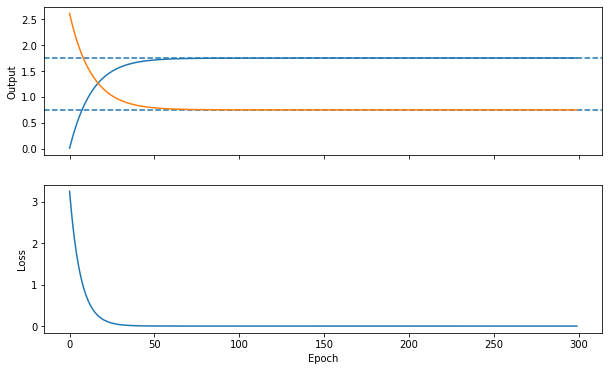

In [88]:
# vectorised

n_hidden = 21
np.random.seed(1)

# Created some toy data by hand 
# (clear correlations between input and output)
x = np.array([[0.25, -0.25],  # (n_features, batchsize)
              [0.25, -0.25], 
              [1, -1]])

# We now have minibatches, so outputs are 2D
y = np.array([[1.75], 
             [0.75]])

batch_size = x.shape[1]

W1 = np.random.normal(size=(n_hidden, 3)) # assume some random weights and data
W2 = np.random.normal(size=(1, n_hidden)) # assume some random weights and data


learning_rate = 0.01 # Learning rate needs to be smaller to converge now!
losses = []
outputs = []
epochs = range(300)
for j in epochs:
    # forward pass
    s1 = np.dot(W1, x)  # Column vector : (n_hidden, bs)
    
    f1 = sigmoid(s1)    # ... again
    
    # output of second linear layer
    s2 = np.dot(W2, f1) # Column vec:     (1,1)
    #print(W2.shape, f1.shape, s2.shape)
    # least squares loss
    L = np.mean((y - s2.T)**2)
    # backward pass
    # gradient of loss wrt input
    dLds2 = -2*(y - s2.T)  # (1 , 1)
    ds2df1 = W2                # local gradient      (bs, n_hidden)
    dLdf1 = dLds2.dot(ds2df1)  # chain rule/BP       (bs, n_hidden)
    dLdw2 = f1.dot(dLds2)           # backprop into w2    (bs, n_hidden)
    
    # now this gets fed back into the first layer
    
    df1ds1 = sigmoid_slope(f1) # local gradient      (n_hidden, bs)
    
    dLds1 = dLdf1.T*df1ds1                      #    (n_hidden, bs)
   
    #dLdx = dLds1.T.dot(W1)      # backprop into x     (n_features, bs)
    
    
    dLdw1 = dLds1.dot(x.T)           # backprop into w     (n_hidden, n_features)
    # we're done with BP! we have the gradients on the inputs to the circuit
    # now update the weights
    
    W1 += -learning_rate*dLdw1
    W2 += -learning_rate*dLdw2.T
    
    losses.append(L)
    outputs.append(s2)
outputs = np.array(outputs).reshape(-1, 2)
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,6))
axs[0].set_ylabel('Output')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')

#print(w)
axs[0].axhline(y[0], ls='--')
axs[0].axhline(y[1], ls='--')
axs[0].plot(outputs[:, 0])
axs[0].plot(outputs[:, 1])
axs[1].plot(epochs, losses)


Everything seems to be working okay, since the solution has converged to the correct non-trivial solution. We can also see that with two layers the model converges much faster to the solution.